In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [66]:
dataset = pd.read_csv('coding_round_data.csv')

In [67]:
#Checking for null values
dataset.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Looks like there are no null values present in the dataset.

In [68]:
dataset['Revenue'].value_counts(normalize=True)

False    0.845255
True     0.154745
Name: Revenue, dtype: float64

<AxesSubplot:xlabel='Revenue', ylabel='count'>

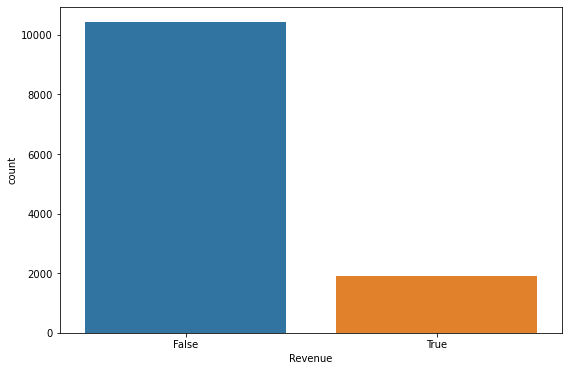

In [69]:
fig, ax = plt.subplots(figsize=(9,6))
sns.countplot(dataset['Revenue'])

There is severe class imbalance issue in this dataset. 

Dominating class is Revenue - False covering almost 85% of the dataset

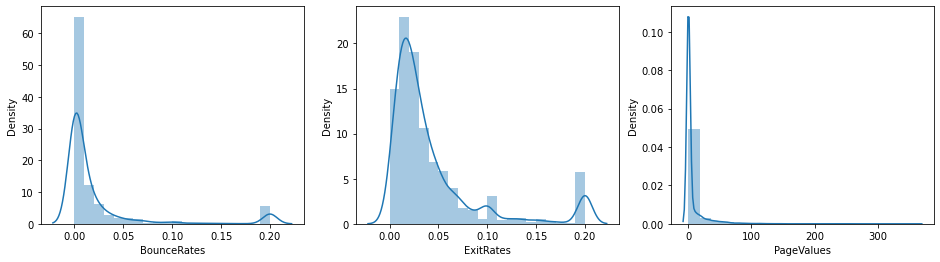

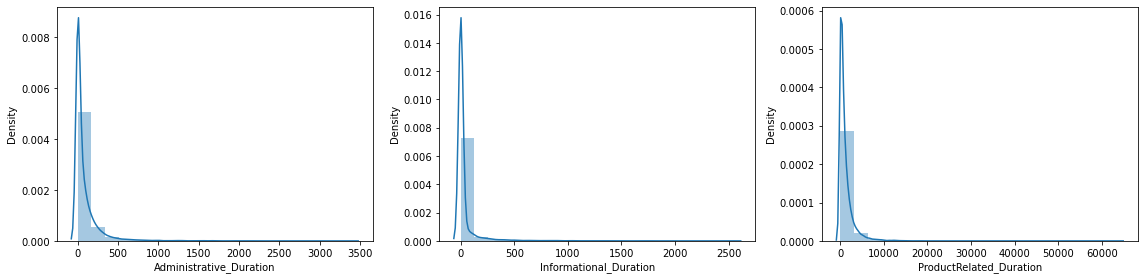

In [70]:
fig = plt.figure(figsize=(16, 4))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
sns.distplot(dataset['BounceRates'], bins=20, ax=ax1)
sns.distplot(dataset['ExitRates'], bins=20, ax=ax2)
sns.distplot(dataset['PageValues'], bins=20, ax=ax3)

fig = plt.figure(figsize=(16, 4))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
sns.distplot(dataset['Administrative_Duration'], bins=20, ax=ax1)
sns.distplot(dataset['Informational_Duration'], bins=20, ax=ax2)
sns.distplot(dataset['ProductRelated_Duration'], bins=20, ax=ax3)

plt.tight_layout()
plt.show()

All the numerical columns are skewed to the right. Applying transformation like standardization will help reduce the skewness.

<AxesSubplot:xlabel='Month', ylabel='count'>

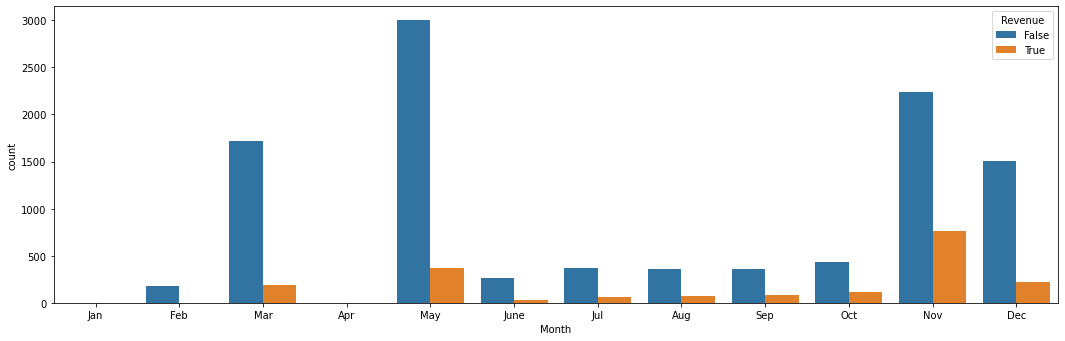

In [71]:
fig = plt.figure(figsize=(18, 12))
ax1 = fig.add_subplot(2, 1, 1)
orderlist = ['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']
sns.countplot(data=dataset, x='Month', hue='Revenue', ax=ax1, order=orderlist)

On March and May have the most number of visitors (May is the month with the highest number of visits), yet transactions made during those 2 months are less when compared to Nov and Dec

There are no visitors during the months of Jan and Feb

In [79]:
def outliers(val, q1, q3):
    IQR = q3 - q1
    lower_bound = q1 - (IQR * 10)
    upper_bound = q3 + (IQR * 10)
    
    if val > upper_bound or val < lower_bound:
        return True
    else:
        return False

AD_q1 = np.percentile(np.sort(dataset['Administrative_Duration'].values), [25])
AD_q3 = np.percentile(np.sort(dataset['Administrative_Duration'].values), [75])
dataset['Administrative_Duration_outlier'] = dataset['Administrative_Duration'].apply(lambda x: outliers(x, AD_q1, AD_q3))

ID_q1 = np.percentile(np.sort(dataset['Informational_Duration'].values), [25])
ID_q3 = np.percentile(np.sort(dataset['Informational_Duration'].values), [75])
dataset['Informational_Duration_outlier'] = dataset['Informational_Duration'].apply(lambda x: outliers(x, ID_q1, ID_q3))

PD_q1 = np.percentile(np.sort(dataset['ProductRelated_Duration'].values), [25])
PD_q3 = np.percentile(np.sort(dataset['ProductRelated_Duration'].values), [75])
dataset['ProductRelated_Duration_outlier'] = dataset['ProductRelated_Duration'].apply(lambda x: outliers(x, PD_q1, PD_q3))

print('Number of outliers based on IQR test with distance set to 10')
print('ProductRelated_Duration : {}'.format(dataset['ProductRelated_Duration_outlier'].sum()))
print('Informational_Duration : {}'.format(dataset['Informational_Duration_outlier'].sum()))
print('Administrative_Duration : {}'.format(dataset['Administrative_Duration_outlier'].sum()))

Number of outliers based on IQR test with distance set to 10
ProductRelated_Duration : 22
Informational_Duration : 2405
Administrative_Duration : 78


Looks like the duration features are extremely noisy, even after setting distance in IQR outlier test to 10 there are so many outliers. We cannot use IQR method to remove the outliers

In [80]:
def z_score_outlier(val, mean, std):
    z = (val - mean)/std
    if z > 5 or z < -5:
        return True
    else:
        return False

AD_mean = dataset['Administrative_Duration'].mean()
AD_std = dataset['Administrative_Duration'].std()
dataset['Administrative_Duration_outlier_Z'] = dataset['Administrative_Duration'].apply(lambda x: z_score_outlier(x,
                                                                                                                  AD_mean,
                                                                                                                  AD_std))
ID_mean = dataset['Informational_Duration'].mean()
ID_std = dataset['Informational_Duration'].std()
dataset['Informational_Duration_outlier_Z'] = dataset['Informational_Duration'].apply(lambda x: z_score_outlier(x,
                                                                                                                ID_mean,
                                                                                                                ID_std))
PD_mean = dataset['ProductRelated_Duration'].mean()
PD_std = dataset['ProductRelated_Duration'].std()
dataset['ProductRelated_Duration_outlier_Z'] = dataset['ProductRelated_Duration'].apply(lambda x: z_score_outlier(x,
                                                                                                                PD_mean,
                                                                                                                PD_std))

print('Number of outliers based on Z_Score test with max std 5')
print('ProductRelated_Duration : {}'.format(dataset['ProductRelated_Duration_outlier_Z'].sum()))
print('Informational_Duration : {}'.format(dataset['Informational_Duration_outlier_Z'].sum()))
print('Administrative_Duration : {}'.format(dataset['Administrative_Duration_outlier_Z'].sum()))


Number of outliers based on Z_Score test with max std 5
ProductRelated_Duration : 68
Informational_Duration : 117
Administrative_Duration : 95


In [86]:
dataset[(dataset['ProductRelated_Duration_outlier_Z'] == True) |
        (dataset['Informational_Duration_outlier_Z'] == True) |
        (dataset['Administrative_Duration_outlier_Z'] == True)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType,VisitorType,Weekend,Revenue,Administrative_Duration_outlier,Informational_Duration_outlier,ProductRelated_Duration_outlier,Administrative_Duration_outlier_Z,Informational_Duration_outlier_Z,ProductRelated_Duration_outlier_Z
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,1,Returning_Visitor,False,False,False,False,False,False,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,2,Returning_Visitor,False,False,False,False,False,False,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,3,Returning_Visitor,False,False,False,False,False,False,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,4,Returning_Visitor,False,False,False,False,False,False,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,4,Returning_Visitor,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,1,Returning_Visitor,True,False,False,False,False,False,False,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,8,Returning_Visitor,True,False,False,False,False,False,False,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,13,Returning_Visitor,True,False,False,False,False,False,False,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,...,11,Returning_Visitor,False,False,False,False,False,False,False,False


These values can be removed from the dataset.

<AxesSubplot:xlabel='VisitorType', ylabel='count'>

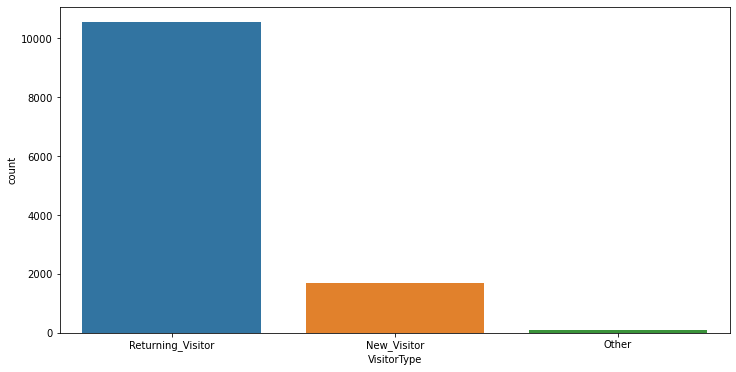

In [91]:
fig = plt.figure(figsize=(12, 6))
sns.countplot(dataset['VisitorType'])

Looks like the company has a lot of returning visitors traffic compared to new visitors traffic. The company should come up with new promotional offers to attract new customers. This can also suggest that once a person uses the website they have good impression about the website and hence comebacks to it.

[Text(0.5, 1.0, 'New Visitors')]

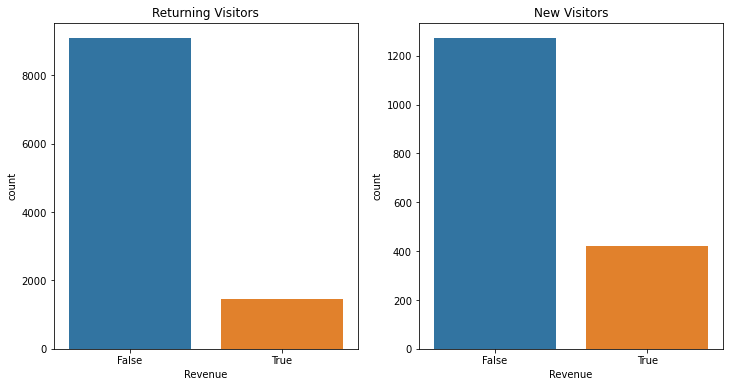

In [93]:
fig, ax =plt.subplots(1,2, figsize=(12, 6))
sns.countplot(dataset[dataset['VisitorType'] == 'Returning_Visitor']['Revenue'],
              ax=ax[0]).set(title='Returning Visitors')
sns.countplot(dataset[dataset['VisitorType'] == 'New_Visitor']['Revenue'],
              ax=ax[1]).set(title='New Visitors')

Looking at the purchasing behavior of the Visitor type suggests that there is not a significant difference in the behavior between returning and new visitors. However, new visitors have a slightly higher probability of purchasing compared to returning visitors

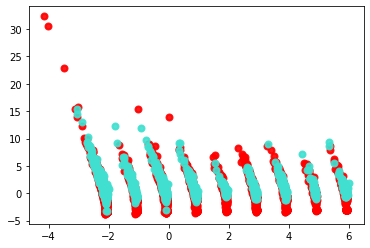

In [102]:
from sklearn.decomposition import PCA
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

column_trans = make_column_transformer((OneHotEncoder(),
                                        ['Month','OperatingSystems','Browser',
                                         'VisitorType','Weekend', 'TrafficType']),
                                       (StandardScaler(), 
                                        ['Administrative', 'Administrative_Duration',
                                         'Informational', 'Informational_Duration',
                                         'ProductRelated', 'ProductRelated_Duration',
                                         'BounceRates', 'ExitRates',
                                         'PageValues', 'SpecialDay']),
                                       remainder='passthrough')


x = dataset.drop(columns=['Revenue'])
y = dataset['Revenue'].astype(int)

column_trans.fit(x)
X = column_trans.transform(x)

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

plt.figure()
colors = ['Red', 'turquoise']
lw = 2
target_names= ["No Purchase", "Purchase"]
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.9, lw=lw,
                label=target_name)

<IPython.core.display.Javascript object>


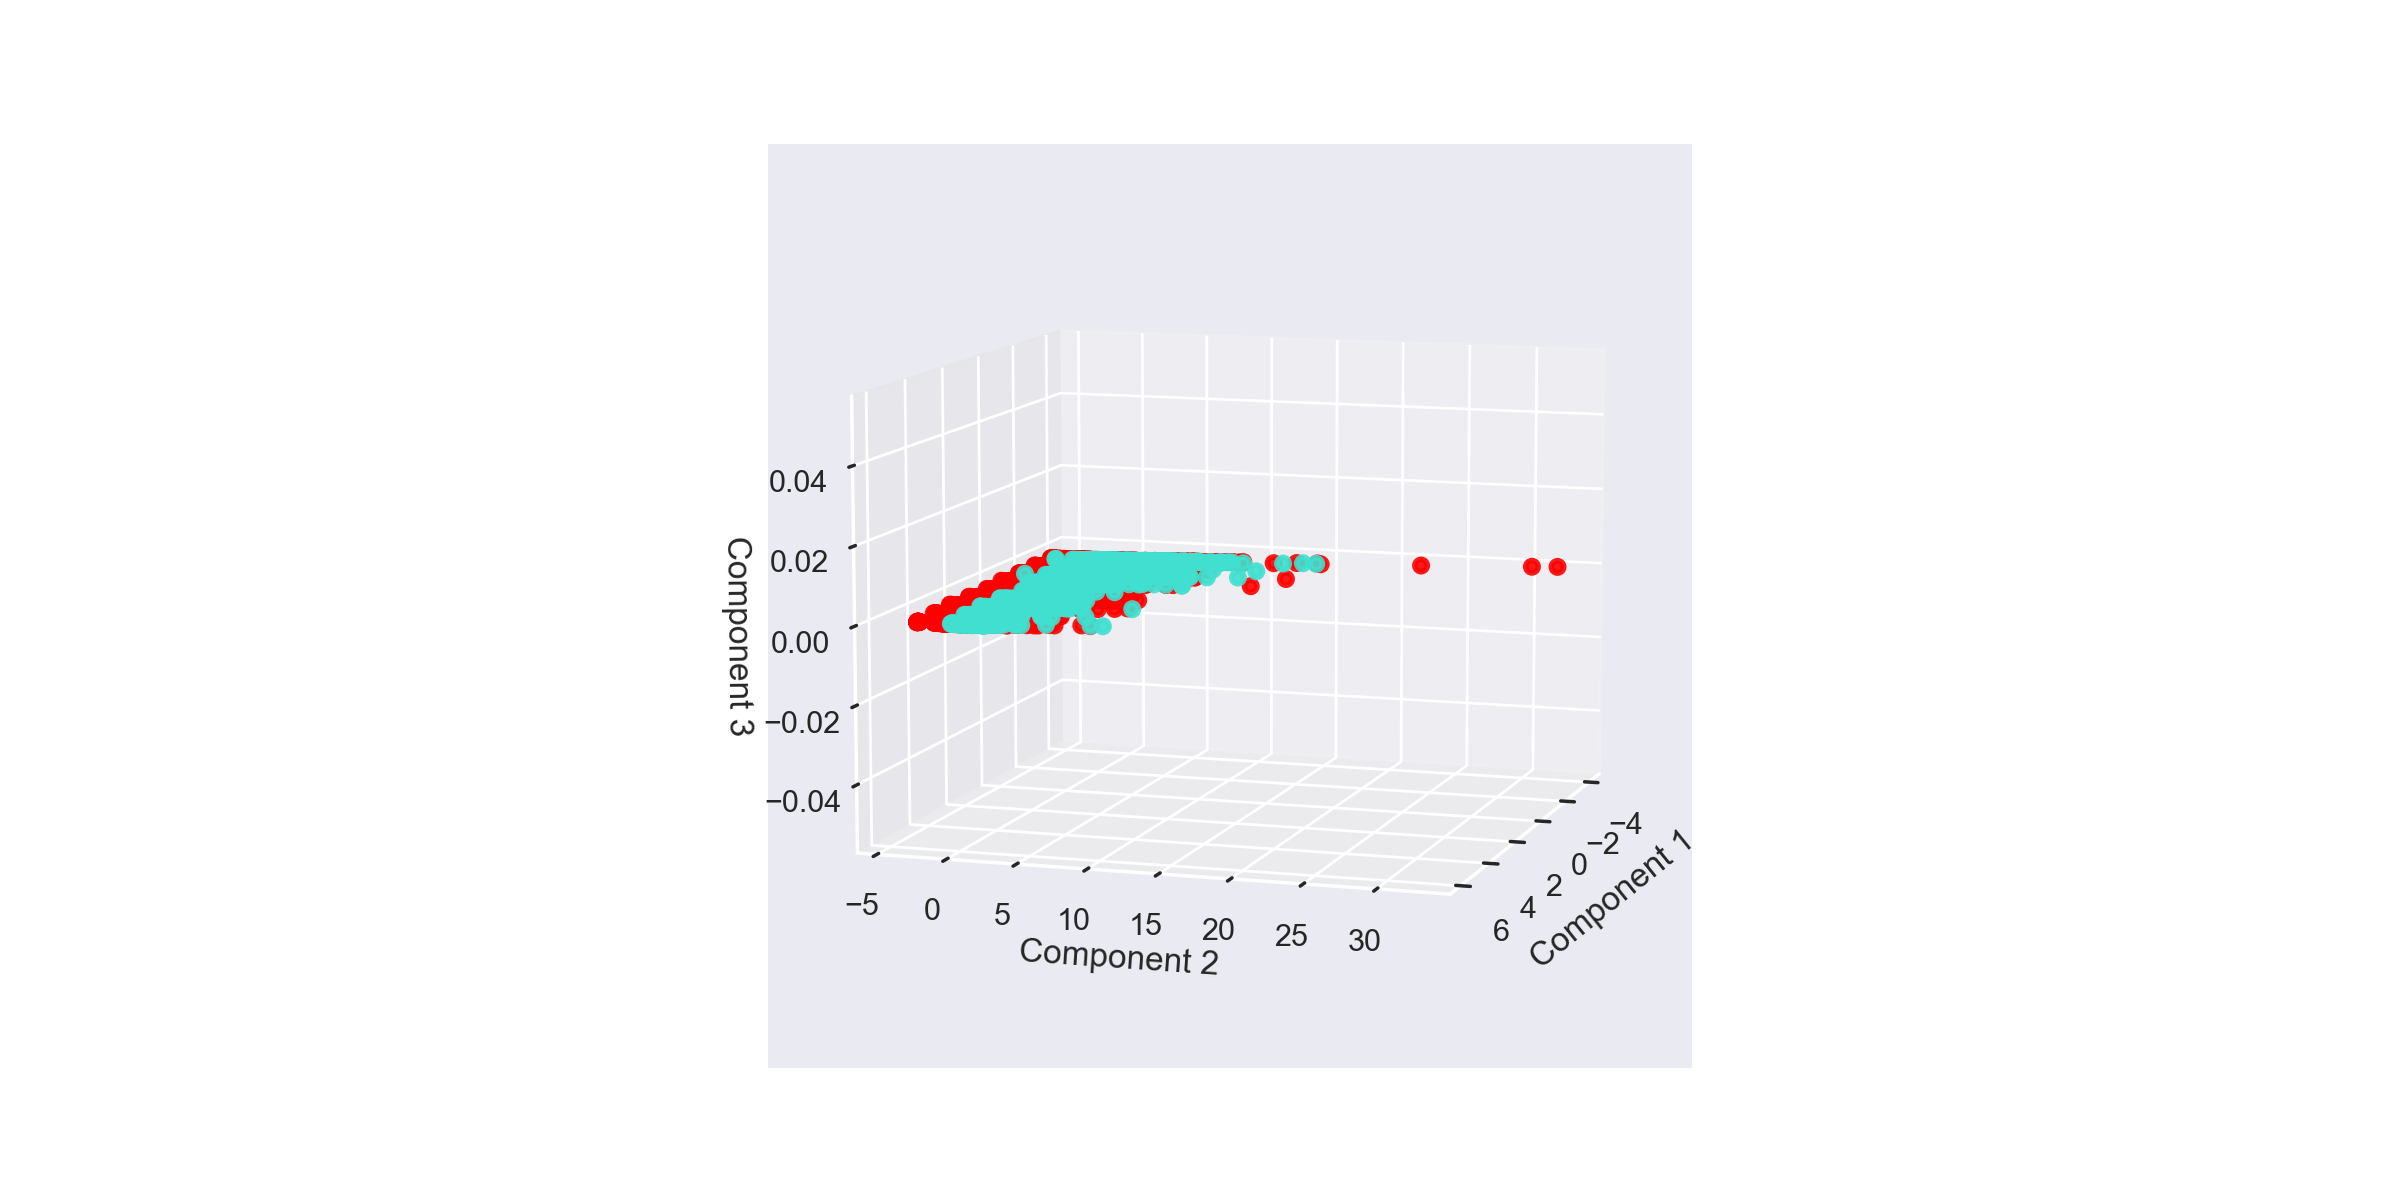

In [107]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

sns.set(style = "darkgrid")

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection = '3d')

pca = PCA(n_components=3)
X_r = pca.fit(X).transform(X)

colors = ['Red', 'turquoise']
lw = 2
target_names= ["No Purchase", "Purchase"]
for color, i, target_name in zip(colors, [0, 1], target_names):
    ax.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.9, lw=lw,
                label=target_name)
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.set_zlabel("Component 3")
    
plt.show()

There is very high overlap of the classes 